<font size="6">MEC301 - Métodos Numéricos</font>
# Ajuste de curvas por mínimos cuadrados
<br><br><br><br>
Profesor: Francisco Ramírez Cuevas<br>
Fecha: 22 de Agosto 2022

## Introducción

La gran mayoría de las fórmulas en la ciencia no pueden ser determinadas de forma teórica y debemos recurrir a relaciones empíricas en base a experimentos. 

Por ejemplo, en mecánica de fluidos decimos que la fuerza de arrastre, $F_D$ sobre un cuerpo es proporcional al cuadrado de la velocidad del flujo alrededor el cuerpo, $V$.

\begin{equation*}
F_D = C_D V^2 
\end{equation*}

Aunque esta relación es válida para cualquier cuerpo, el valor del coeficiente de arrastre $C_D$, cambia dependiendo del objeto.

En la gran mayoría de los casos, este valor no se puede determinar de forma analítica, y debemos recurrir a ensallos en un tunel de viento para determinar la relación entre estas dos variables.

<img src="./images/wind_tunnel.png" width="800" align= center>

El valor de $C_D$ estará dado por la curva que mejor se ajuste a estos valores experimentales.

### Regresión lineal unidimensional
Consideremos el caso más simple donde buscamos la recta $y=f(x)$ que mejor se ajuste a nuestros datos.

\begin{equation*}
y = a_0 + a_1x,
\end{equation*}

donde $a_0$ y $a_1$ son coeficientes representando el intercepto y la pendiente, respectivamente.

**¿Cómo determinamos los coeficientes?** Se puede demostrar que la mejor forma de determinar los coeficientes $a_0$ y $a_1$ es minimizando el error cuadrático:

\begin{equation*}
S_r = \sum_{i=1}^m \left(y_i - a_0 - a_1 x_i\right)^2 \label{eq:error_linear1D}
\end{equation*}

donde $i = 1,...,m$ son los datos de la muestra considerando un total de $m$ datos.

Este criterio se denomina **ajuste por mínimos cuadrados,** y tiene un número de ventajas, como por ejemplo, entregar una solución única para un set de datos.

### Ajuste por mínimos cuadrados paso a paso

Primero, para buscar el mínimo de $S_r$ aplicamos la derivada respecto a sus variables, es decir, $a_0$ y $a_1$

\begin{align*}
\frac{\partial S_r}{\partial a_0} &= -2 \sum \left(y_i - a_0 - a_1 x_i\right)
\\
\frac{\partial S_r}{\partial a_1} &= -2 \sum \left[\left(y_i - a_0 - a_1 x_i\right)x_i\right]
\end{align*}

El mínimo está dado cuando ambas derivadas son $0$.

\begin{align*}
0 &= \sum y_i - a_0\sum 1 - a_1\sum x_i
\\
0 &=  \sum y_ix_i - a_0\sum x_i - a_1 \sum x_i^2
\end{align*}

El resultado podemos expresarlo como un sistema de ecuaciones lineales:

\begin{equation*}
\begin{bmatrix}
m & \sum x_i \\
\sum x_i & \sum x_i^2
\end{bmatrix}
\left[\begin{array}{c} a_0 \\a_1\end{array}\right] =
\left[\begin{array}{c} \sum y_i \\\sum x_iy_i \end{array}\right]
\end{equation*}

La solución de este sistema nos entregará los valores de $a_0$ y $a_1$

Consideremos los datos del problema del tunel de viento

In [1]:
import numpy as np

xi = np.array([ 10, 20,  30,  40,  50,   60,  70,  80])
yi = np.array([ 25, 70, 380, 550, 610, 1220, 830, 1450])

# construimos un sistema Ax = b
m = len(xi)
A = np.array([
              [   m     ,  np.sum(xi)  ],
              [np.sum(xi), np.sum(xi**2)]
             ])

b = np.array([[np.sum(yi)],
              [np.sum(yi*xi)]])

# resolvemos el sistema
a = np.linalg.solve(A,b) 
print('Modelo lineal: \n y = %.3f + %.3f*x' % (a[0], a[1]))

Modelo lineal: 
 y = -234.286 + 19.470*x


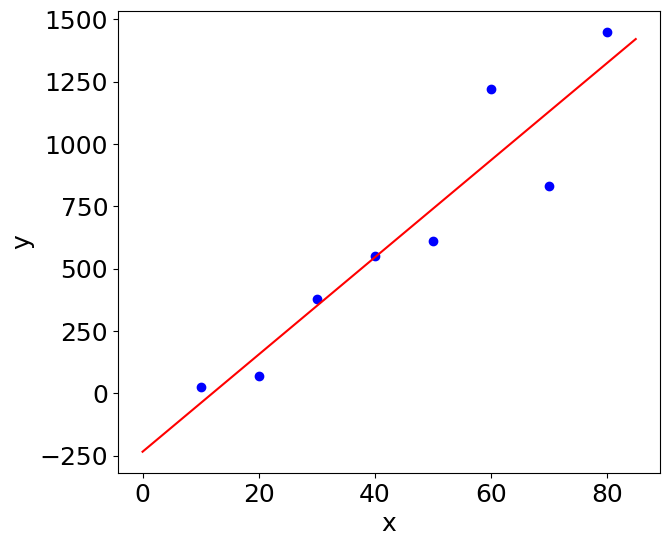

In [2]:
# ploteamos nuestro resultado
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 18})

# contruimos el modelo
y = lambda x: a[0] + a[1]*x
x = np.linspace(0,85,100)  # creamos un arreglo para ploteo

plt.figure(figsize = (7,6))
plt.plot(xi, yi, 'bo')
plt.plot(x, y(x), '-r')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### Cuantificación del error

Para cuantificar la calidad de nuestro modelo utilizamos el **coeficiente de determinación, $r^2$:**

\begin{equation}
r^2 = \frac{S_t - S_r}{S_t}
\end{equation}

donde $S_r$ es el error del modelo lineal, y $S_t = \sum\left(y_i - \bar{y}\right)^2$ es la desviación de los datos respecto a la media $\bar{y}$.

>El coeficiente de determinación nos permite cuantificar la calidad de nuestro modelo para representar una muestra, en comparación con la media $\bar{y}$.

En python este valor está dado por la función `r2_score` de la librería `scikit-learn`

In [3]:
from sklearn.metrics import r2_score 
print('coef. de determinación')
print('r2 = %.4f' % r2_score(yi,y(xi)))

coef. de determinación
r2 = 0.8805


> El resultado indica que el modelo lineal explica un 88.05% de los datos

>**Notar que `r2_score(yi,y(xi)))` requiere dos arreglos de iguales dimensiones.** 

### Linealización de funciones no lineales
Existen algúnos modelos no lineales comúnes en ingeniería que pueden ser linealizados para luego realizar ajuste por mínimos cuadrados.

Algúnos ejemplos son:
- **modelo exponencial**

\begin{equation*}
y = \alpha e^{\beta x} \Rightarrow \ln(y) = \ln(\alpha) + \beta x
\end{equation*}

- **modelo de potencia**

\begin{equation*}
y = \alpha x^{\beta} \Rightarrow \log(y) = \log(\alpha) + \beta \log (x)
\end{equation*}

- **modelo de tasa de crecimiento de saturación**

\begin{equation*}
y = \alpha \frac{x}{\beta + x} \Rightarrow 
\frac{1}{y} = \frac{1}{\alpha} +\frac{\beta}{\alpha}\frac{1}{x}
\end{equation*}

<img src="./images/linealization.png" width="800" align= center>

> Para el modelo de potencia, podemos usar "$\log$" o "$\ln$" para linealizar, tomando la precausión de usar la función inversa correcta para recuperar el modelo original, es decir:

\begin{align*}
y &= 10^{\log \alpha + \beta\log x}\quad\mathrm{o,}\\
y &= e^{\ln \alpha + \beta\ln x}
\end{align*}

> **Los coeficientes del modelo linealizado serán diferentes** dependiendo de si se usa "$\log$" o "$\ln$". **Sin embargo, el modelo original debe ser el mismo**, independientemente de la función utilizada para la linealización.

Analicemos el ejemplo anterior, ahora ajustando los datos al modelo de potencia $y = \alpha x^{\beta}$

In [4]:
import numpy as np
from numpy import log # en python log(x) = ln(x)
xi = np.array([ 10, 20,  30,  40,  50,   60,  70,  80])
yi = np.array([ 25, 70, 380, 550, 610, 1220, 830, 1450])

# linealizamos las variables
log_xi = log(xi)
log_yi = log(yi)

# construimos un sistema Ax = b
m = len(xi)   # numero de datos
A = np.array([[   m          ,  np.sum(log_xi)  ],
              [np.sum(log_xi), np.sum(log_xi**2)]])

b = np.array([[np.sum(log_yi)],
              [np.sum(log_yi*log_xi)]])

# resolvemos el sistema
a = np.linalg.solve(A,b) 
print('Modelo linealizado: \n log(y) = %.3f + %.3f*log(x)' 
      % (a[0], a[1]))

Modelo linealizado: 
 log(y) = -1.294 + 1.984*log(x)


Para retornar al modelo original, aplicamos

\begin{equation*}
y = e^{\left(a_0+a_1\ln x\right)}
\end{equation*}

In [5]:
from numpy import exp
print('Modelo no-lineal')
print('y = %.3f*x^%.3f' % (exp(a[0]), a[1]))

Modelo no-lineal
y = 0.274*x^1.984


Graficamos el resultado linealizado y sin linealizar

In [6]:
from numpy import exp

# reconstrumimos el modelo original con: exp(log(a)+b log(x))
y = lambda x: exp(a[0] + a[1]*log(x))

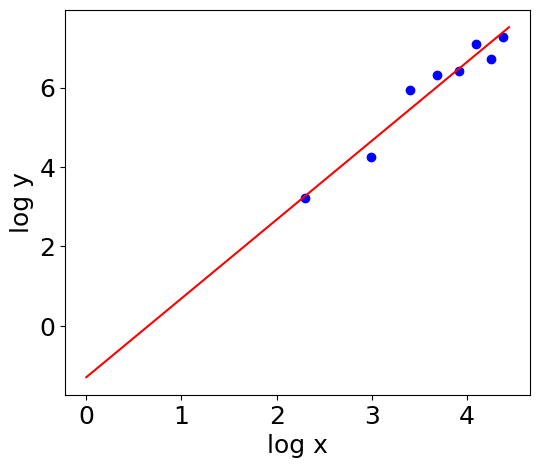

In [7]:
# modelo linealizado
import matplotlib.pyplot as plt
x = np.linspace(1,85,100) # arreglo para ploteo

plt.rcParams.update({'font.size': 18})
plt.figure(figsize = (6,5))
plt.plot(log_xi, log_yi, 'bo')
plt.plot(log(x), log(y(x)), '-r')
plt.xlabel('log x')
plt.ylabel('log y')
plt.show()

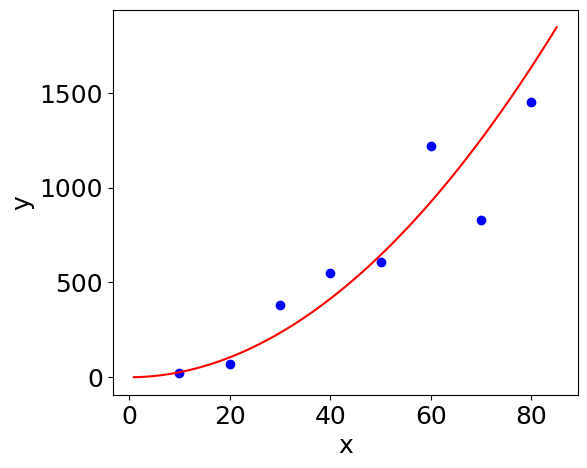

In [8]:
# modelo original
import matplotlib.pyplot as plt
x = np.linspace(1,85,100) # arreglo para ploteo

plt.rcParams.update({'font.size': 18})
plt.figure(figsize = (6,5))
plt.plot(xi, yi, 'bo')
plt.plot(x, y(x), '-r')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Analizamos la calidad del modelo

In [9]:
# analizamos la calidad del modelo
from sklearn.metrics import r2_score 

print('coef. de determinación')
print('r2 = %.4f' % r2_score(yi,y(xi)))

coef. de determinación
r2 = 0.8088


> El resultado indica que el modelo lineal explica un 80.88% de los datos

El coeficiente de determinación para el modelo no-lineal ($r^2=80.88\%$) es menor que para el modelo lineal ($r^2=88.05\%$). Sin embargo, el modelo no-lineal se ajusta mejor al modelo físico (por ejemplo, $F = 0$ para $v = 0$).

Por lo tanto, el modelo de potencia:
\begin{equation*}
y = 0.274 x^{1.984},
\end{equation*}

es el más adecuado para los datos.

## Otros modelos lineales
El procedimiento de ajuste de curva por mínimos cuadrados se puede extender para modelos de ajuste más complejos, tales como:
- Regresión polinomial
- Regresión lineal multivariable

### Regresión polinomial
En su forma general, el modelo polinomial corresponde a una función univariable de la forma

\begin{equation}
y = a_0 + a_1x + a_2x^2+a_3x^3+... a_n x^n 
\end{equation}

Por ejemplo, consideremos el modelo $y = a_0 + a_1 x + a_2 x^2$. Según el método de regresión por mínimos cuadrados, la mejor curva está dada por el mínimo de:
\begin{equation*}
S_r = \sum_{i=1}^m \left(y_i - a_0 - a_1 x_i - a_2 x_i^2\right)^2,
\end{equation*}

Aplicando $\frac{\partial S_r}{\partial a_0} =0$, $\frac{\partial S_r}{\partial a_1} =0$ y $\frac{\partial S_r}{\partial a_2} =0$, llegamos al sistema de ecuaciones:

\begin{equation*}
\begin{bmatrix}
     m     & \sum x_i   & \sum x_i^2 \\
\sum x_i   & \sum x_i^2 & \sum x_i^3 \\
\sum x_i^2 & \sum x_i^3 & \sum x_i^4 \\
\end{bmatrix}
\left[\begin{array}{c} a_0 \\a_1\\a_2\end{array}\right] =
\left[\begin{array}{c} \sum y_i \\\sum x_iy_i\\\sum x_i^2y_i \end{array}\right]
\end{equation*}

Cuya solución nos entrega el valor de los coeficientes $a_0$, $a_1$ y $a_2$

In [10]:
import numpy as np
xi = np.array([ 10, 20,  30,  40,  50,   60,  70,  80])
yi = np.array([ 25, 70, 380, 550, 610, 1220, 830, 1450])

# construimos un sistema Ax = b
m = len(xi)
A = np.array([[   m         , np.sum(xi),     np.sum(xi**2)],
              [np.sum(xi)   , np.sum(xi**2),  np.sum(xi**3)],
              [np.sum(xi**2), np.sum(xi**3),  np.sum(xi**4)]])

b = np.array([[np.sum(yi)      ],
              [np.sum(yi*xi)   ],
              [np.sum(yi*xi**2)]])

# resolvemos el sistema
a = np.linalg.solve(A,b) 
print('Modelo polinomial: \n y = %.3f + %.3f*x + %.3f*x^2' 
      % (a[0], a[1], a[2]))

Modelo polinomial: 
 y = -178.482 + 16.122*x + 0.037*x^2


In [11]:
# reconstrumimos como exp(log(a)+b log(x))
y = lambda x: a[0] + a[1]*x + a[2]*x**2

# analizamos la calidad del modelo
from sklearn.metrics import r2_score 

print('coef. de determinación')
print('r2 = %.4f' % r2_score(yi,y(xi)))

coef. de determinación
r2 = 0.8818


Notar como gráficamente el modelo sigue una tendencia casi lineal.

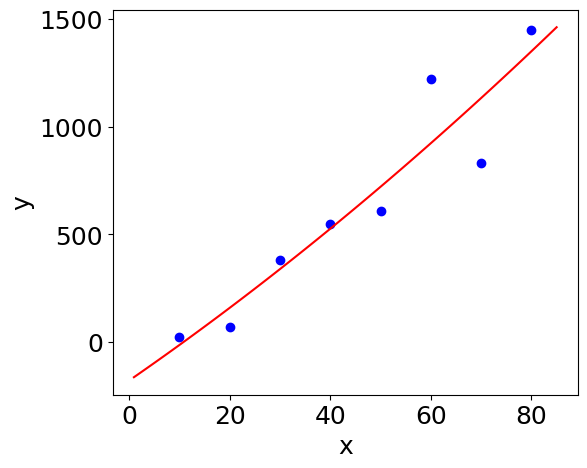

In [12]:
import matplotlib.pyplot as plt
x = np.linspace(1,85,100) # arreglo para ploteo

plt.rcParams.update({'font.size': 18})
plt.figure(figsize = (6,5))
plt.plot(xi, yi, 'bo')
plt.plot(x, y(x), '-r')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Al incluir término $a_2x^2$ en nuestro modelo lineal, $a_0 + a_1x$, esperabamos un mejor ajsute con el modelo físico $F_D = C_D V^2$.

Sin embargo, la tendencia del método por minimizar el error (en otras palabras, mejorar $r^2$) lleva a forzar una curva lineal que no se ajusta a la física del problema.

### Regresión lineal multidimensional
Para problemas con más de una variable independiente se deben untilizar modelos multidimencionales. Un modelo común corresponde al modelo linear de la forma:

\begin{equation}
y = a_0 + a_1x_1 + a_2x_2+a_3x_3+... a_n x_n 
\end{equation}

Por ejemplo, para dos dimensiones tenemos:
\begin{equation*}
y = a_0 + a_1x_1+a_2x_2
\end{equation*}

la mejor curva está dada por el mínimo de:

\begin{equation*}
S_r = \sum_{i=1}^m \left(y_i - a_0 - a_1x_{1,i}+a_2x_{2,i}\right)^2,
\end{equation*}

Aplicando $\frac{\partial S_r}{\partial a_0} =0$, $\frac{\partial S_r}{\partial a_1} =0$ y $\frac{\partial S_r}{\partial a_2} =0$, llegamos al sistema de ecuaciones:

\begin{equation*}
\begin{bmatrix}
     m       & \sum x_{1,i}        & \sum x_{2,i} \\
\sum x_{1,i} & \sum x_{2,i}        & \sum x_{1,i}x_{2,i} \\
\sum x_{2,i} & \sum x_{1,i}x_{2,i} & \sum x_{2,i}^2 \\
\end{bmatrix}
\left[\begin{array}{c} a_0 \\a_1\\a_2\end{array}\right] =
\left[\begin{array}{c} \sum y_i \\\sum x_{1,i}y_i\\\sum x_{2,i}y_i \end{array}\right]
\end{equation*}

Cuya solución nos entrega el valor de los coeficientes $a_0$, $a_1$ y $a_2$

Gráficamente, el método de regresión por mínimos cuadrados corresponde a determinar el plano que minimice el error cuadrático.

<img src="./images/2D_plane.png" width="300" align= center>

## Regresión por mínimos cuadrados generalizado

### Modelo lineal generalizado
Todos los modelos revisados anteriormente pertenecen a un modelo lineal general con la forma:

\begin{equation}
y = a_0z_0+a_1z_1+a_2z_2+...a_nz_n,
\end{equation}

donde $z_0, z_1,..., z_n$ son funciones base. 

Por ejemplo:

|modelo|$z_0$|$z_1$|$z_2$|
|:-:|:-:|:-:|:-:|
|linear unidimensional| $1$|$x$||
|polinomial| $1$|$x$| $x^2$|
|linear multidimensional| $1$|$x_1$| $x_2$|

El término "*lineal*" hace referencia al tipo de dependencia entre las funciones base. Tal como sucede con el modelo polinomial, las funciones base $z_i$ pueden ser no-lineales. Por ejemplo, sinusoides:

\begin{equation*}
y = a_0 + a_1 \cos\left(x\right) + a_1 \sin\left(x\right) + a_3 \cos\left(2x\right) + a_4 \sin\left(2x\right) ...,
\end{equation*}


### Regresión por mínimos cuadrados
En general, se busca minimizar el error:
\begin{equation}
S_r = \sum_{i=1}^m (y(x_i) - y_i)^2 = \sum_{i=1}^m \left[\sum_{j=1}^n a_j z_j(x_i) - y_i\right]^2.
\end{equation}

Se puede demostrar que la minimización de este error está dado por la solución del sistema:

\begin{equation}
Z^T Z \alpha = Z^T Y
\end{equation}

donde:
\begin{equation*}
Z =\begin{bmatrix}
z_0(x_1) & z_1(x_1) & \cdots & z_n(x_1)\\
z_0(x_2) & z_1(x_2) & \cdots & z_n(x_2)\\
\vdots & \vdots   & \ddots & \vdots \\
z_0(x_m) & z_1(x_m) & \cdots & z_n(x_m)
\end{bmatrix};
\quad\quad
\alpha = \begin{bmatrix} a_0 \\ a_1 \\ \vdots \\a_n\end{bmatrix};
\quad\quad
Y = \begin{bmatrix} y_1 \\ y_2 \\ \vdots \\y_m\end{bmatrix}
\end{equation*}

La solución está dada por $ \alpha = \left(Z^T Z\right)^{-1}Z^T Y$. 

>La matriz $\left(Z^T Z\right)^{-1}Z^T$ se conoce como **matriz pseudo-inversa**

## Mínimos cuadrados en python
Analicemos distintos métodos en python para ajustar el modelo de ajuste para el experimento del tunel de viento

### numpy.linalg.pinv (matriz pseudo inversa)
Una forma directa de encontrar los coeficientes del modelo de regresión es determinando la matriz pseudo inversa directamente

Consideremos un modelo lineal, $y = a_0+a_1x$ para el ejemplo del tunel de viento. 

La matriz $Z$ en este caso es:

\begin{equation*}
Z =\begin{bmatrix}
1 & x_1 \\
1 & x_2 \\
\vdots & \vdots \\
1 & x_m 
\end{bmatrix}
\end{equation*}

In [13]:
import numpy as np
from numpy.linalg import pinv # pseudo-inverse

# recopilación de la muestra
xi = np.array([ 10, 20,  30,  40,  50,   60,  70,  80])
yi = np.array([ 25, 70, 380, 550, 610, 1220, 830, 1450])

# construimos la matriz Z en base al modelo a0 + a1*x
Z = np.vstack((xi**0, xi**1)).T

# matriz pseudo-inversa (A^T*A)^(-1)*A^T
a = np.dot(pinv(Z),yi)
print('Modelo lineal: y = %.3f + %.3f*x' % (a[0], a[1]))

Modelo lineal: y = -234.286 + 19.470*x


>La función `numpy.vstack` genera una matriz $k\times N$, considerando $k$ arreglos 1D con $N$ elementos cada uno. **Es la forma más segura de apilar vectores fila** (ver documentación [acá](https://numpy.org/doc/stable/reference/generated/numpy.vstack.html)).

### numpy.linalg.lstsq (solución de sistemas lineales por mínimos cuadrados)
Es un método general para resolver sistemas lineales de la forma $Ax = b$, independiente la relación entre el número de ecuaciones linealmente independientes y el número de incognitas (es decir, sistemas $\mathrm{rank}\left([A|b]\right)\neq \mathrm{rank}\left(A\right) $). Se basa en minimizar la norma de Frobenius $\|Ax-b\|$.

La función `lstsq` genera más de un output (ver documentación [acá](https://numpy.org/doc/stable/reference/generated/numpy.linalg.lstsq.html)). Para conceptos del modelo de ajuste, solo necesitamos el primer output `[0]`

In [14]:
import numpy as np
from numpy.linalg import lstsq

# construimos el modelo
xi = np.array([ 10, 20,  30,  40,  50,   60,  70,  80])
yi = np.array([ 25, 70, 380, 550, 610, 1220, 830, 1450])

# construimos la matriz Z en base al modelo a0 + a1*x
Z = np.vstack((xi**0, xi**1)).T

a = np.linalg.lstsq(Z, yi, rcond=None)[0]
print('Modelo lineal: y = %.3f + %.3f*x' % (a[0], a[1]))

Modelo lineal: y = -234.286 + 19.470*x


### numpy.polyfit (sistemas polinomiales de unidimencionales)
Esta función está especificamente diseñada para modelos polinomiales de una dimensión, es decir, $y = a_0 + a_1x +a_2x^2+...a_nx^n$

**Los coeficientes de `polyfit` están ordenados de mayor potencia a menor potencia.** Por ejemplo, para generar un modelo en base a un polinomio de orden 2, 
```python
a = numpy.polyfit(xi,yi,2) # coeficientes a0, a1, a2, ...
```
donde $a_0=$ `a[2]`, $a_1=$ `a[1]`, $a_2=$ `a[0]`

Para evitar confusiones con el orden de los coeficientes, **se recomienda utilizar `numpy.polyval(a,x)` para genera una función en base al modelo determinado**, donde `x` es un valor arbitrario y `a` son los coeficientes determinados por `polyfit`.
```python
y = numpy.polyval(a,x) # función en base al modelo y(x) = a0 + a1*x + ... am*x^m
```

In [15]:
import numpy as np

# construimos el modelo
xi = np.array([ 10, 20,  30,  40,  50,   60,  70,  80])
yi = np.array([ 25, 70, 380, 550, 610, 1220, 830, 1450])

# Aplicamos modelo polinomial con polyfit
a = np.polyfit(xi,yi,2)
print('Modelo polinomial:')
print('y = %.3f + %.3f*x + %.3f*x^2' % (a[2], a[1], a[0]))

Modelo polinomial:
y = -178.482 + 16.122*x + 0.037*x^2


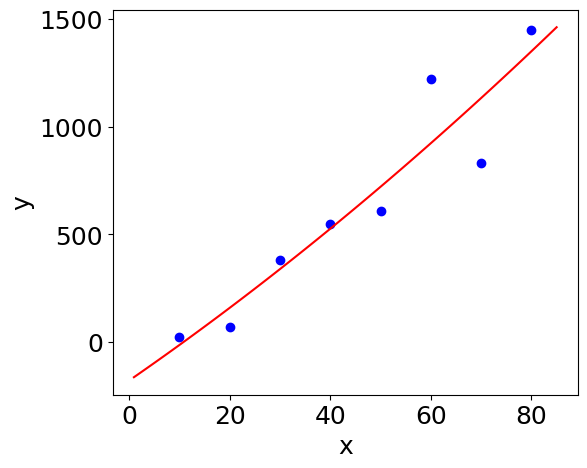

In [16]:
# evaluamos el modelo con polyval
import matplotlib.pyplot as plt
x = np.linspace(1,85,100) # arreglo para ploteo

plt.rcParams.update({'font.size': 18})
plt.figure(figsize = (6,5))
plt.plot(xi, yi, 'bo')
plt.plot(x, np.polyval(a,x), '-r') # y(x) con polyval
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### scipy.optimize.curve_fit (regresión no-lineal)
Esta función utiliza un método iterativo para ajustar una curva a una muestra. La función `curve_fit` puede ser utilizada para cualquier tipo de modelo, linear o no-linear, unidimensional o multidimensional.

La función entrega una serie de outputs (ver documentación [acá](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html)). Sin embargo, para determinar los coeficientes solo necesitamos el output `[0]`

Por ejemplo, ajustemos los datos al modelo $y=\alpha x^\beta$

In [17]:
import numpy as np
from scipy.optimize import curve_fit

xi = np.array([ 10, 20,  30,  40,  50,   60,  70,  80])
yi = np.array([ 25, 70, 380, 550, 610, 1220, 830, 1450])

# definimos nuestro modelo en formato de función
def model(x,a,b):
    y = a*x**b
    return y

a = curve_fit(model, xdata = xi, ydata = yi)[0]
print('Modelo no-lineal')
print('y = %.3f*x^%.3f' % (a[0], a[1]))

Modelo no-lineal
y = 2.538*x^1.436


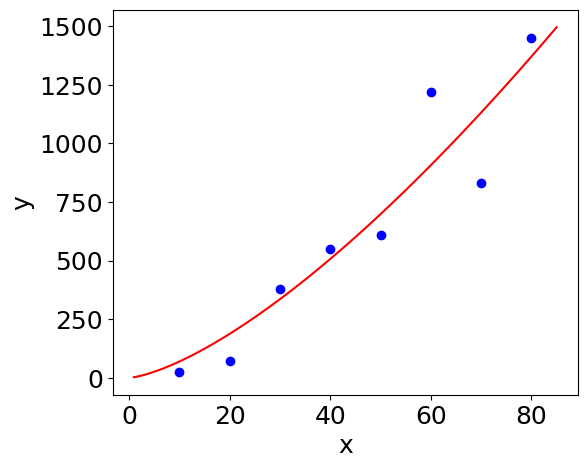

In [18]:
import matplotlib.pyplot as plt
x = np.linspace(1,85,100) # arreglo para ploteo

plt.rcParams.update({'font.size': 18})
plt.figure(figsize = (6,5))
plt.plot(xi, yi, 'bo')
plt.plot(x, model(x,a[0],a[1]), '-r')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Notar que los coeficientes de este modelo son diferentes a los que determinamos mediante regresión lineal en la función linealizada.

\begin{equation*}
y = 0.274x^{1.984}\quad\left(r^2=80.88\%\right)
\end{equation*}

Esto es debido a que la regresión no-lineal busca minimizar el error

\begin{equation*}
S_r = \sum_{i=1}^m (f_\mathrm{nl}(x_i) - y_i)^2,
\end{equation*}

de forma iterativa, y sin linealizar el modelo no-lineal $f_\mathrm{nl}(x)$. Así, `curve_fit` permite buscar soluciones con valores $r^2$ más cercanos a $1$ que no son accesibles para el modelo lineal

En efecto, si analizamos el coeficiente de determinación del modelo generado por `curve_fit`:

In [19]:
from sklearn.metrics import r2_score 
print('coef. de determinación')
print('r2 = %.4f' % r2_score(yi,model(xi,a[0],a[1])))

coef. de determinación
r2 = 0.8769


En el caso de un modelo lineal, ambos métodos generan el mismo modelo

In [20]:
import numpy as np
from scipy.optimize import curve_fit

xi = np.array([ 10, 20,  30,  40,  50,   60,  70,  80])
yi = np.array([ 25, 70, 380, 550, 610, 1220, 830, 1450])

def model(x,a,b):
    y = a+ b*x
    return y

a = curve_fit(model, xdata = xi, ydata = yi)[0]
print('Modelo lineal: y = %.3f + %.3f*x' % (a[0], a[1]))

Modelo lineal: y = -234.286 + 19.470*x


### Regresión lineal vs no-lineal

Respecto a la regresión no-lineal:

**Ventajas**
- Permite trabajar con modelos más generales. 
- Para modelos no-lineales, el método produce curvas con mejores coeficientes de determinación en comparación con modelos lineales en base a linealización.

**Desventajas**
- Como todo método iterativo, el metodo puede sufrir problemas de inestabilidad condicionados al modelo propuesto, $f_\mathrm{nl}(x)$. Esto puede derivar en problemas de convergencia, soluciones locales, o sensibilidad a los valorse iniciales.

>En general, se recomienda **utilizar `scipy.optimize.curve_fit`**, u otros métodos de ajuste no-lineal, **exclusivamente para modelos no-lineales**. 

## Referencias
- Kong Q., Siauw T., Bayen A. M. **Chapter 16: Least Square Regression** in *[Python Programming and Numerical Methods – A Guide for Engineers and Scientists](https://pythonnumericalmethods.berkeley.edu/notebooks/Index.html)*, 1st Ed., Academic Press, 2021

- Chapra S., Canale R. **Capítulo 17: Regresión por mínimos cuadrados** en *Métodos Numéricos para Ingenieros*, 6ta Ed., McGraw Hill, 2011